In [61]:
# змінити на None для отримання випадкових значень
random_seed = 42
import random
random.seed(random_seed)
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM


def one_class_svm_research(df):

    param_info_list = []
    outlier_percentage_list =  []
    point_detected_list = []
    
    df['y_pred'] = OneClassSVM(kernel='linear', nu=0.4).fit_predict(df[['x1','x2']])
    df.plot(x='x1', y='x2',c='y_pred',kind='scatter',colormap='PiYG',s=60, alpha=0.7)

    result = pd.DataFrame(data={
        '%_outliers':outlier_percentage_list,
        'point_detected':point_detected_list
    })
    
    return result

[0 0 0 ... 0 0 0]


,%_outliers,point_detected


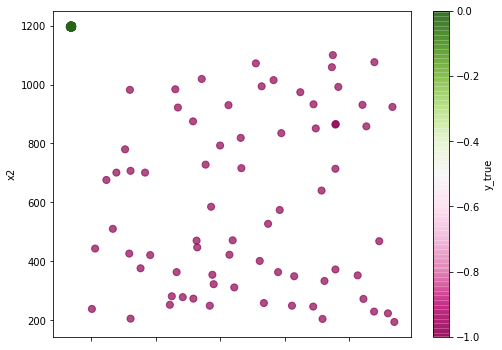

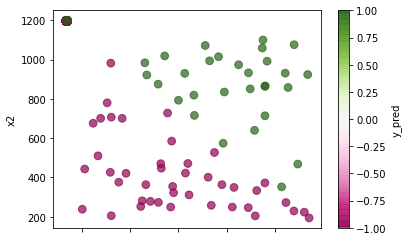

In [105]:
from numpy.ma.core import append
X, y_true = make_blobs(
    n_samples=3461,
    n_features=2,
    centers=1, 
    center_box=(1100, 1200)
)

outlinerPercentage = 2;
outlinerIndexes = [];
#generate anomaly-object indexes
while len(outlinerIndexes) < (len(X[:,0]) / 100) * outlinerPercentage:
  number = random.randint(0, len(X[:,0] - 1))
  if outlinerIndexes.count(number) == 0:
    outlinerIndexes.append(number)

print(y_true)

outlier_index = 0
#set maximum and minimum X coordinates
max_x1 = X[:,0].max() + 1000
min_x2 = X[:,1].min() - 1000
X[outlier_index][0] = max_x1
X[outlier_index][1] = min_x2
y_true[outlier_index] = -1

#set the rest of objects to anomaly
for outlier_index in outlinerIndexes:
  X[outlier_index][0] = random.randint(1200, int(max_x1))
  X[outlier_index][1] = random.randint(int(min_x2), 1100)
  y_true[outlier_index] = -1

f = open("data.csv", "w")
for row in range(len(X[:,0])):
  writeStr = '{};{};{}\n'.format(X[row,0], X[row,1], y_true[row])
  f.write(writeStr)

f.close()
df = pd.DataFrame(
    data={
        'x1':X[:,0],
        'x2':X[:,1],
        'y_true':y_true
    }
)

df.plot(x='x1', y='x2',c='y_true',kind='scatter',colormap='PiYG',s=50,alpha=0.7, figsize=(8,6));

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
nus = [0.9, 0.5, 0.1, 0.01, 0.005, 0.0001]

one_class_svm_research(df)

[-1  0  0 ...  0  0  0]
0       1
1       1
2      -1
3       1
4      -1
       ..
3456    1
3457   -1
3458   -1
3459   -1
3460   -1
Name: y_pred, Length: 3461, dtype: int64


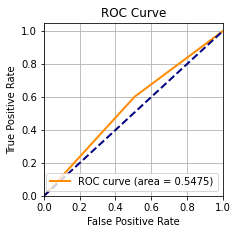

In [104]:
# Get ROC curve FPR and TPR from true labels vs score values
print(y_true)
print(df['y_pred'])
fpr, tpr, _ = roc_curve(y_true, df['y_pred'], pos_label = 0)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()